### imports

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [33]:
df = pd.read_csv("Data/covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### Data Processing

In [34]:
df.isnull().sum().sum()

0

In [35]:
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Cover_Type"]), df["Cover_Type"], test_size=0.2, random_state=42)


In [37]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (464809, 54)
X_test shape: (116203, 54)
y_train shape: (464809,)
y_test shape: (116203,)


In [38]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [39]:
y_train[:10]

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

### XGBoost

In [63]:
XGboost = XGBClassifier(
    n_estimators=700,
    max_depth=8,
    learning_rate=0.2,
    objective='multi:softprob',
    random_state=42
)

XGboost.fit(X_train, y_train)
y_pred = XGboost.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.966842508368975


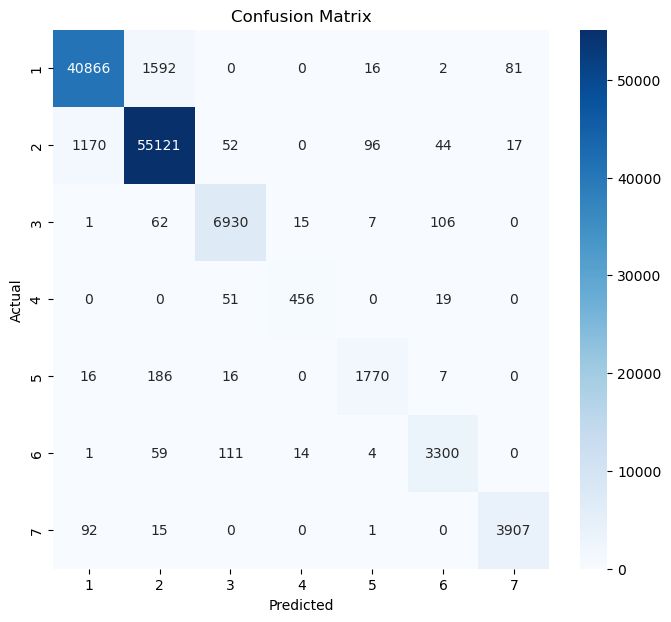

In [64]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

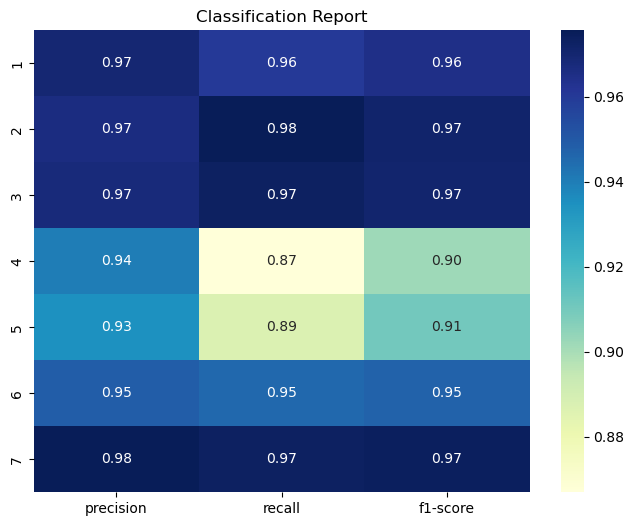

In [65]:
report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().iloc[:-3]

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:, :3], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.show()

<Figure size 800x600 with 0 Axes>

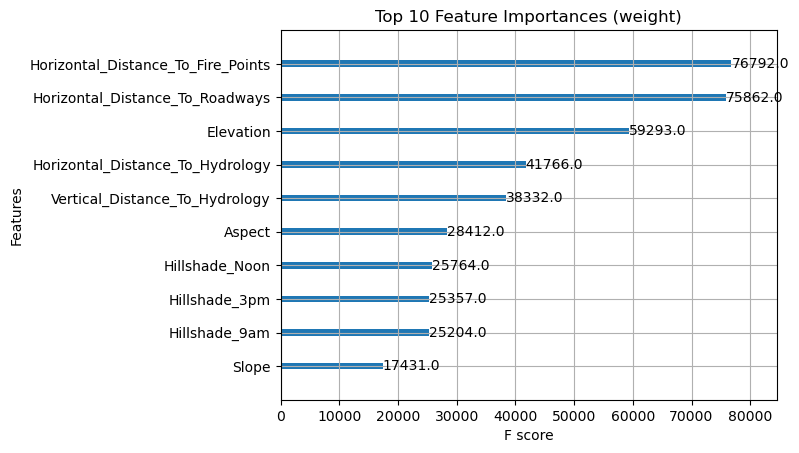

<Figure size 800x600 with 0 Axes>

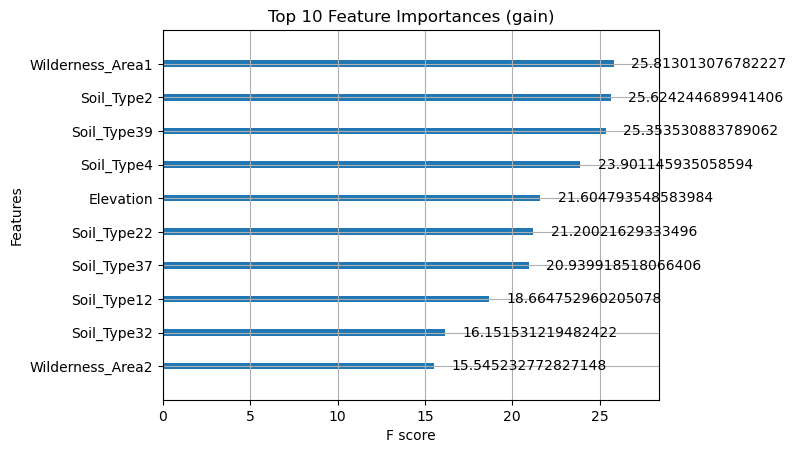

<Figure size 800x600 with 0 Axes>

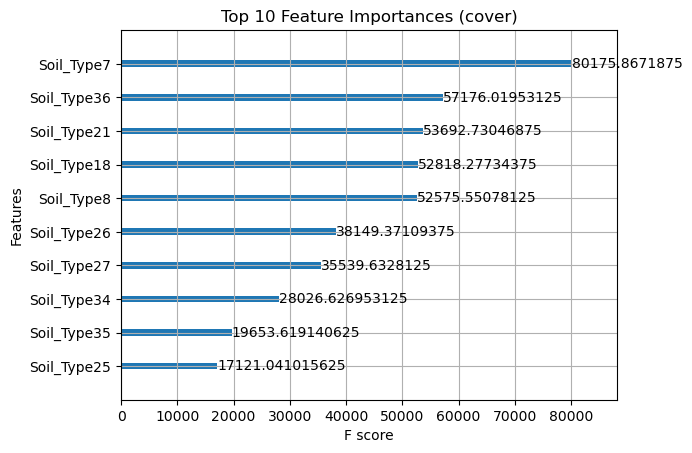

In [66]:
import xgboost


importance_type = ['weight', 'gain', 'cover']

for i in range(3):
    plt.figure(figsize=(8, 6))
    xgboost.plot_importance(XGboost, importance_type=importance_type[i], max_num_features=10,)
    plt.title(f"Top 10 Feature Importances ({importance_type[i]})")
    plt.show()

### Random Forest

In [ ]:
RF = RandomForestClassifier(
    n_estimators=1000,
    max_depth=8,
    random_state=42
)

RF.fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)

print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf)) ### XGBoost is much Better

Random Forest Accuracy Score: 0.7221672418095918


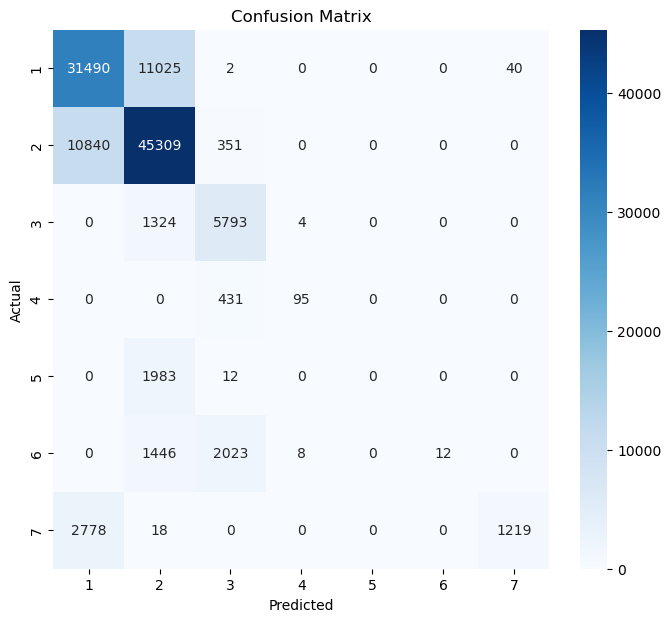

In [70]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()